In [1]:
import numpy as np
import matplotlib.pyplot as plt
from SpectralSynthesis import fBm
from tqdm import tqdm
import pandas as pd
import colorsys

In [2]:
def box_count(field, k):
    windows = np.lib.stride_tricks.sliding_window_view(field, (k, k))
    return windows[::k, ::k, ...].sum(axis=(-2, -1))

def generalisedBoxDimension(field, q=0, plot=False):
    N=field.shape[0]
    x = N
    sizes = [x]
    while x>1:
        x=x//2
        sizes.append(x)
    sizes = np.array(sizes)[:-1]

    Zs = []
    for size in sizes:
        P = (box_count(field,size)/np.sum(field))**q
        Z = np.sum(P)
        Zs.append(Z)

    coeffs=np.polyfit(np.log(sizes), np.log(Zs), 1)

    if plot:
        f, axes = plt.subplots(1,2)

        axes[0].plot(np.log(sizes),np.log(Zs), 'o', mfc='none')
        axes[0].plot(np.log(sizes), np.polyval(coeffs,np.log(sizes)))
        axes[0].set_xlabel('log $\epsilon$')
        axes[0].set_ylabel('log Z')

        axes[1].imshow(field)
        plt.show()

    return coeffs[0]/(q-1)

def area_scatter(x,y):
    var_x = np.var(x)
    var_y = np.var(y)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    prod = np.array([i-mean_x for i in x])*np.array([j-mean_y for j in y])
    mixed_var = 1/len(prod) * np.sum(prod)
    return np.sqrt(var_x*var_y-mixed_var**2)

def generate_D(H_list, N_pix, S_list):
    D_20s = []
    D_neg10s = []
    total = len(H_list)
    for H,S in tqdm(zip(H_list,S_list), total = total):
        field = fBm(N_pix*4, E, H=H, sigma=S, exp=True)
        field = field[int((N_pix*4-N_pix)/2):int((N_pix*4+N_pix)/2),
                      int((N_pix*4-N_pix)/2):int((N_pix*4+N_pix)/2)]
        D_20 = generalisedBoxDimension(field, 20, False)
        D_neg10 = generalisedBoxDimension(field, -10, False)
        D_20s.append(D_20)
        D_neg10s.append(D_neg10)
    return (np.array(D_20s), np.array(D_neg10s))

In [3]:
N=1000
q=0
E=2
N_fields = int(1e3)
FILEPATH = f'D:\Workshop\PhD\Data\Elia clusters\Eliaplot_nonperiodic_{N}px_{N_fields}samples.pkl'
rerun = False

In [4]:
if rerun:
    df_1000 = pd.DataFrame()
    H_params = np.random.random(3*N_fields)
    df_1000['H'] = H_params
    df_1000['S'] = [0.1]*N_fields+[1]*N_fields+[3]*N_fields
    df_1000['marker'] = ['o']*N_fields+['*']*N_fields+['x']*N_fields
    df_1000['D_20'],df_1000['D_-10'] = generate_D(df_1000['H'],N, df_1000['S'])
    df_1000.to_pickle(FILEPATH)
else:
    df_1000 = pd.read_pickle(FILEPATH)
df_1000

,H,S,marker,D_20,D_-10
0,0.211018,0.1,o,1.987344,2.004809
1,0.986579,0.1,o,1.996486,2.001671
2,0.867125,0.1,o,1.997911,2.000872
3,0.778142,0.1,o,1.995721,2.002048
4,0.121613,0.1,o,1.986236,2.006779
...,...,...,...,...,...
2995,0.580089,3.0,x,1.502197,2.871550
2996,0.794013,3.0,x,1.691021,2.326809
2997,0.731542,3.0,x,1.461969,2.822107
2998,0.644291,3.0,x,1.583211,2.604196


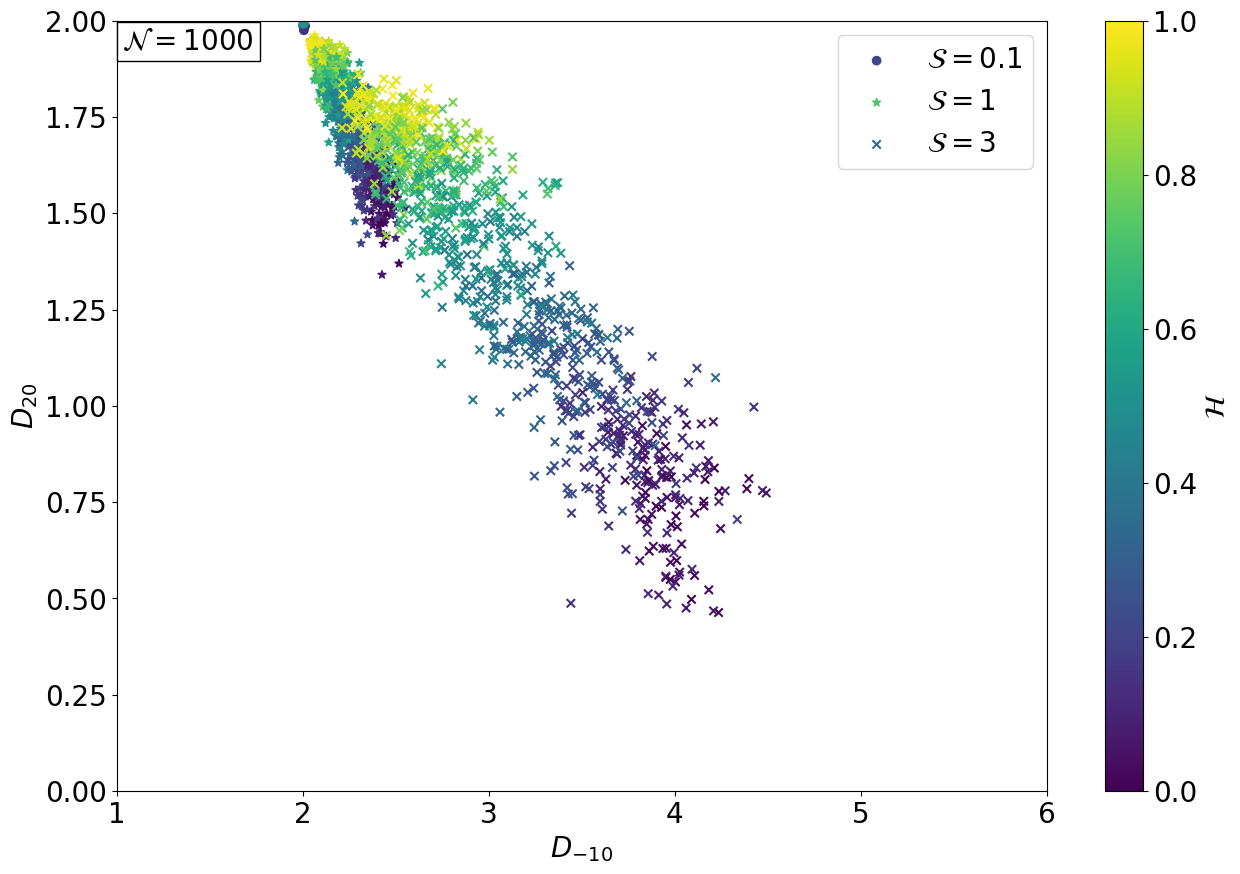

In [6]:
plt.figure(figsize=(10*1.5, 10))
plt.rcParams.update({'font.size': 20})
plt.scatter(df_1000[df_1000['S']==0.1]['D_-10'],df_1000[df_1000['S']==0.1]['D_20'],c=df_1000[df_1000['S']==0.1]['H'], marker = 'o', label = r'$\mathcal{S}= 0.1$', vmin = 0, vmax=1)
plt.scatter(df_1000[df_1000['S']==1]['D_-10'],df_1000[df_1000['S']==1]['D_20'],c=df_1000[df_1000['S']==1]['H'], marker = '*', label = r'$\mathcal{S}= 1$', vmin = 0, vmax=1)
plt.scatter(df_1000[df_1000['S']==3]['D_-10'],df_1000[df_1000['S']==3]['D_20'],c=df_1000[df_1000['S']==3]['H'], marker = 'x', label = r'$\mathcal{S}= 3$', vmin = 0, vmax=1)
cbar = plt.colorbar()
plt.xlim(1,6)
plt.ylim(0,2)
plt.xlabel(r'$D_{{-10}}$')
plt.ylabel(r'$D_{{20}}$')
cbar.set_label(r'$\mathcal{H}$')
plt.legend()
plt.text(1.03, 1.925, r'$\mathcal{N} = 1000$',bbox = dict(facecolor='white'))
plt.savefig(f'D:\Workshop\PhD\Images/Elia Fractals/Eliaplot_nonperiodic_{N}px_{N_fields}samples.png',bbox_inches="tight")
plt.show()

In [7]:
N=100
N_fields = int(1e3)
FILEPATH = f'D:\Workshop\PhD\Data\Elia clusters\Eliaplot_nonperiodic_{N}px_{N_fields}samples.pkl'
rerun = False

In [8]:
if rerun:
    df_100 = pd.DataFrame()
    H_params = np.random.random(3*N_fields)
    df_100['H'] = H_params
    df_100['S'] = [0.1]*N_fields+[1]*N_fields+[3]*N_fields
    df_100['marker'] = ['o']*N_fields+['*']*N_fields+['x']*N_fields
    df_100['D_20'],df_100['D_-10'] = generate_D(df_100['H'],N, df_100['S'])
    df_100.to_pickle(FILEPATH)
else:
    df_100= pd.read_pickle(FILEPATH)
df_100

,H,S,marker,D_20,D_-10
0,0.685092,0.1,o,1.993748,2.001049
1,0.711746,0.1,o,1.993701,2.001908
2,0.254828,0.1,o,1.984728,2.006929
3,0.244886,0.1,o,1.982189,2.008691
4,0.827832,0.1,o,1.995493,2.000631
...,...,...,...,...,...
2995,0.095177,3.0,x,0.919836,4.506043
2996,0.420801,3.0,x,1.035128,4.000143
2997,0.054712,3.0,x,0.800766,4.360551
2998,0.433996,3.0,x,0.909793,3.444867


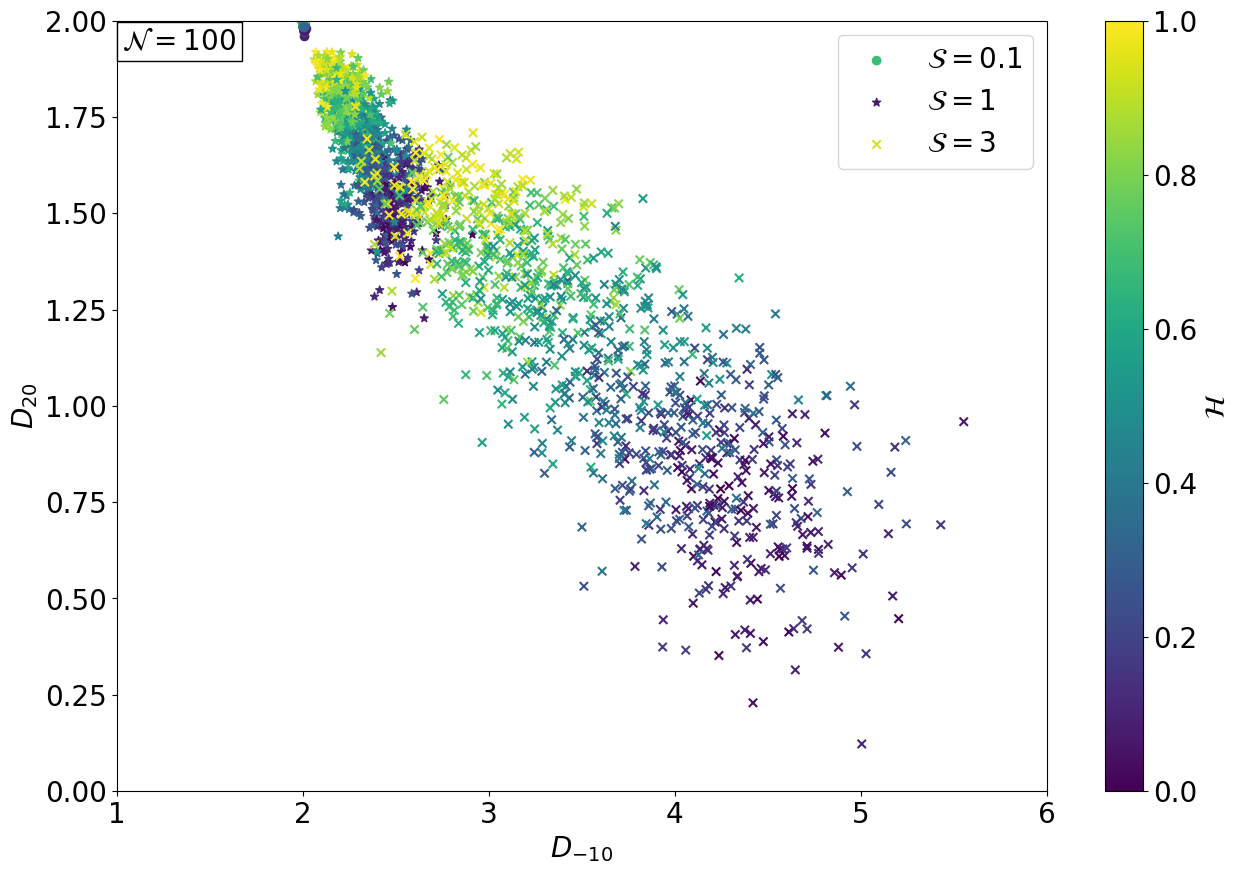

In [9]:
plt.figure(figsize=(10*1.5, 10))
plt.rcParams.update({'font.size': 20})

plt.scatter(df_100[df_100['S']==0.1]['D_-10'],df_100[df_100['S']==0.1]['D_20'],c=df_100[df_100['S']==0.1]['H'], marker = 'o', label = r'$\mathcal{S}= 0.1$', vmin = 0, vmax=1)
plt.scatter(df_100[df_100['S']==1]['D_-10'],df_100[df_100['S']==1]['D_20'],c=df_100[df_100['S']==1]['H'], marker = '*', label = r'$\mathcal{S}= 1$', vmin = 0, vmax=1)
plt.scatter(df_100[df_100['S']==3]['D_-10'],df_100[df_100['S']==3]['D_20'],c=df_100[df_100['S']==3]['H'], marker = 'x', label = r'$\mathcal{S}= 3$', vmin = 0, vmax=1)
cbar = plt.colorbar()
cbar.set_label(r'$\mathcal{H}$')
plt.xlim(1,6)
plt.ylim(0,2)
plt.xlabel(r'$D_{{-10}}$')
plt.ylabel(r'$D_{{20}}$')
plt.text(1.03, 1.925, r'$\mathcal{N}=100$',bbox = dict(facecolor='white'))
plt.legend()
#plt.savefig(f'D:\Workshop\PhD\Images/Elia Fractals/Eliaplot_nonperiodic_{N}px_{N_fields}samples.png',bbox_inches="tight")
plt.show()

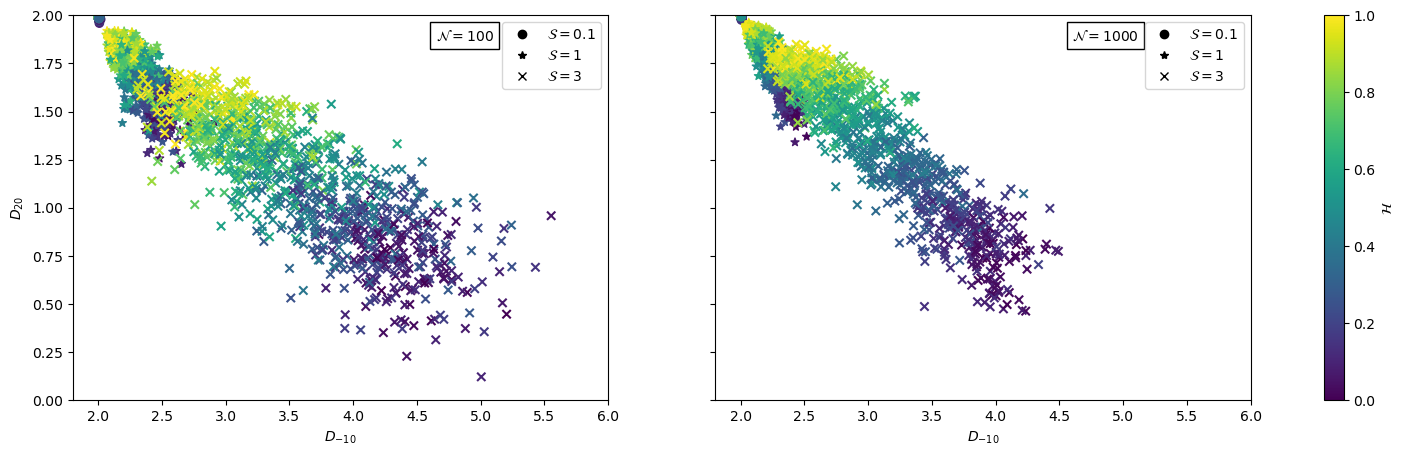

In [14]:
import matplotlib as mpl
import matplotlib.lines as mlines

plt.rcParams.update({'font.size': 10})
f,ax = plt.subplots(1,2, figsize=(19,5), sharex = True, sharey = True)

x = 4.65
y = 1.87

ax[0].scatter(df_100[df_100['S']==0.1]['D_-10'],df_100[df_100['S']==0.1]['D_20'],c=df_100[df_100['S']==0.1]['H'], marker = 'o', label = r'$\mathcal{S}= 0.1$', vmin = 0, vmax=1)
ax[0].scatter(df_100[df_100['S']==1]['D_-10'],df_100[df_100['S']==1]['D_20'],c=df_100[df_100['S']==1]['H'], marker = '*', label = r'$\mathcal{S}= 0.1$', vmin = 0, vmax=1)
ax[0].scatter(df_100[df_100['S']==3]['D_-10'],df_100[df_100['S']==3]['D_20'],c=df_100[df_100['S']==3]['H'], marker = 'x', label = r'$\mathcal{S}= 0.1$', vmin = 0, vmax=1)

ax[0].set_xlim(1.8,6)
ax[0].set_ylim(0,2)
ax[0].set_xlabel(r'$D_{{-10}}$')
ax[0].set_ylabel(r'$D_{{20}}$')

ax[0].text(x, y, r'$\mathcal{N}=100$',bbox = dict(facecolor='white'))
ax[0].legend()
leg = ax[0].get_legend()
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_color('black')

ax[1].scatter(df_1000[df_1000['S']==0.1]['D_-10'],df_1000[df_1000['S']==0.1]['D_20'],c=df_1000[df_1000['S']==0.1]['H'], marker = 'o', label = r'$\mathcal{S}= 0.1$', vmin = 0, vmax=1)
ax[1].scatter(df_1000[df_1000['S']==1]['D_-10'],df_1000[df_1000['S']==1]['D_20'],c=df_1000[df_1000['S']==1]['H'], marker = '*', label = r'$\mathcal{S}= 1$', vmin = 0, vmax=1)
im = ax[1].scatter(df_1000[df_1000['S']==3]['D_-10'],df_1000[df_1000['S']==3]['D_20'],c=df_1000[df_1000['S']==3]['H'], marker = 'x', label = r'$\mathcal{S}= 3$', vmin = 0, vmax=1)

cax,kw = mpl.colorbar.make_axes([a for a in ax])
cbar = plt.colorbar(im, cax=cax, **kw)
ax[1].set_xlabel(r'$D_{{-10}}$')
cbar.set_label(r'$\mathcal{H}$')
ax[1].legend()
ax[1].text(x-0.05, y, r'$\mathcal{N} = 1000$',bbox = dict(facecolor='white'))

circles = mlines.Line2D([], [], marker = 'o', label = r'$\mathcal{S}= 0.1$', color='black', ls='')
stars = mlines.Line2D([], [], marker = '*', label = r'$\mathcal{S}= 1$', ls='', color='black')
crosses = mlines.Line2D([], [], marker = 'x', label = r'$\mathcal{S}= 3$', ls='', color='black')
ax[1].legend(handles=[circles, stars, crosses])
ax[0].legend(handles=[circles, stars, crosses])

plt.savefig(f'D:\Workshop\PhD\Images/Elia Fractals/Eliaplot_Montage.png',bbox_inches="tight")

plt.show()

In [9]:
from scipy.stats import gaussian_kde

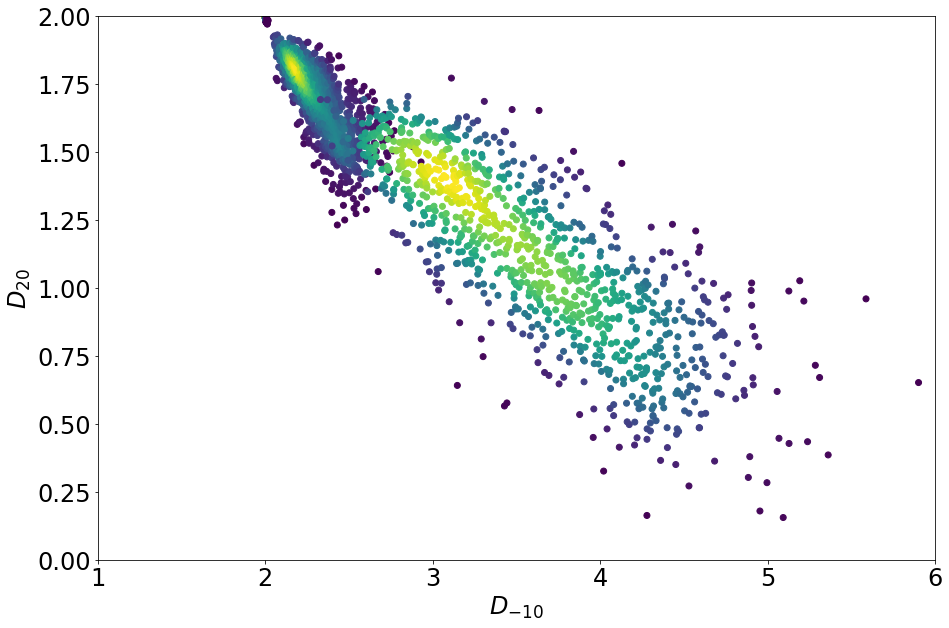

In [20]:
plt.figure(figsize=(10*1.5, 10))
plt.rcParams.update({'font.size': 24})

df_split = df_100[df_100['S']==0.1].sort_values(by=['D_-10'])
xy = np.vstack([df_split['D_-10'],df_split['D_20']])
z = gaussian_kde(xy)(xy)
plt.scatter(df_split['D_-10'],df_split['D_20'], c=z)

df_split = df_100[df_100['S']==1].sort_values(by=['D_-10'])
xy = np.vstack([df_split['D_-10'],df_split['D_20']])
z = gaussian_kde(xy)(xy)
plt.scatter(df_split['D_-10'],df_split['D_20'], c=z)

df_split = df_100[df_100['S']==3].sort_values(by=['D_-10'])
xy = np.vstack([df_split['D_-10'],df_split['D_20']])
z = gaussian_kde(xy)(xy)
plt.scatter(df_split['D_-10'],df_split['D_20'], c=z)

plt.xlim(1,6)
plt.ylim(0,2)

plt.xlabel(r'$D_{{-10}}$')
plt.ylabel(r'$D_{{20}}$')

plt.savefig(f'D:\Workshop\PhD\Images/Elia Fractals/Eliaplot_nonperiodic_{N}px_{N_fields}samplesKDE.png',bbox_inches="tight")

plt.show()

In [ ]:
plt.figure(figsize=(10*1.5, 10))
plt.rcParams.update({'font.size': 24})

df_split = df_100[df_100['S']==0.1].sort_values(by=['D_-10'])
xy = np.vstack([df_split['D_-10'],df_split['D_20']])
z = gaussian_kde(xy)(xy)
plt.scatter(df_split['D_-10'],df_split['D_20'], c=z)

df_split = df_100[df_100['S']==1].sort_values(by=['D_-10'])
xy = np.vstack([df_split['D_-10'],df_split['D_20']])
z = gaussian_kde(xy)(xy)
plt.scatter(df_split['D_-10'],df_split['D_20'], c=z)

df_split = df_100[df_100['S']==3].sort_values(by=['D_-10'])
xy = np.vstack([df_split['D_-10'],df_split['D_20']])
z = gaussian_kde(xy)(xy)
plt.scatter(df_split['D_-10'],df_split['D_20'], c=z)

plt.xlim(1,6)
plt.ylim(0,2)

plt.xlabel(r'$D_{{-10}}$')
plt.ylabel(r'$D_{{20}}$')

plt.savefig(f'D:\Workshop\PhD\Images/Elia Fractals/Eliaplot_nonperiodic_{N}px_{N_fields}samplesKDE.png',bbox_inches="tight")

plt.show()

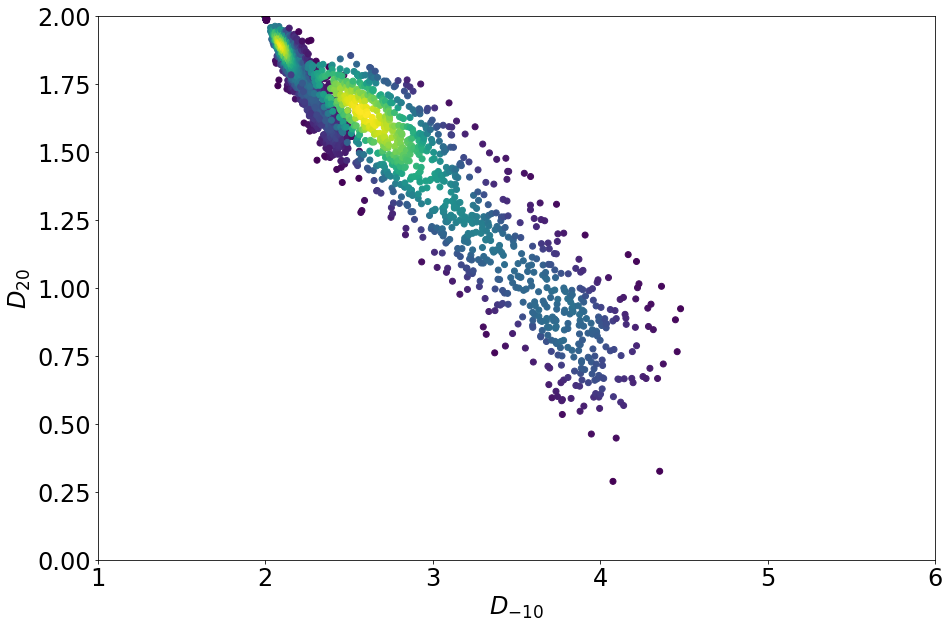

In [21]:
plt.figure(figsize=(10*1.5, 10))
plt.rcParams.update({'font.size': 24})

df_split = df_1000[df_1000['S']==0.1].sort_values(by=['D_-10'])
xy = np.vstack([df_split['D_-10'],df_split['D_20']])
z = gaussian_kde(xy)(xy)
plt.scatter(df_split['D_-10'],df_split['D_20'], c=z)

df_split = df_1000[df_1000['S']==1].sort_values(by=['D_-10'])
xy = np.vstack([df_split['D_-10'],df_split['D_20']])
z = gaussian_kde(xy)(xy)
plt.scatter(df_split['D_-10'],df_split['D_20'], c=z)

df_split = df_1000[df_1000['S']==3].sort_values(by=['D_-10'])
xy = np.vstack([df_split['D_-10'],df_split['D_20']])
z = gaussian_kde(xy)(xy)
plt.scatter(df_split['D_-10'],df_split['D_20'], c=z)

plt.xlim(1,6)
plt.ylim(0,2)

plt.xlabel(r'$D_{{-10}}$')
plt.ylabel(r'$D_{{20}}$')

plt.savefig(f'D:\Workshop\PhD\Images/Elia Fractals/Eliaplot_nonperiodic_1000px_{N_fields}samplesKDE.png',bbox_inches="tight")

plt.show()